### CLASSIFICADORES DE DOENÇA DE PELE - TURMA 1TDSPG





INTEGRANTES:

ANDRÉ SANT'ANA BOIM - RM 551575

GABRIEL ERINGER DE OLIVEIRA - RM 99632

GUILHERME TAVARES INDICIATE - RM 93364

MARCELO HESPANHOL DIAS - RM 98251

MATHEUS AUGUSTO LEITE - RM 99697





Fonte da base de dados: https://www.kaggle.com/datasets/riyaelizashaju/skin-disease-classification-image-dataset

In [1]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>MODELO PREDITIVO KERAS / TENSOR FLOW
  

In [2]:
# Importando as bibliotecas necessárias
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Inicializando listas para armazenar imagens e rótulos

imagens = []
rotulos = []

In [4]:
# Função para carregar imagens de uma pasta

def carregar_imagens(rotulo, caminho_pasta):
    for nome_arquivo in os.listdir(caminho_pasta):
        caminho_arquivo = os.path.join(caminho_pasta, nome_arquivo)
        imagem = cv2.imread(caminho_arquivo)
        imagem = cv2.resize(imagem, (224, 224))
        imagens.append(imagem)
        rotulos.append(rotulo)

In [5]:
# Carregando imagens de diferentes pastas

carregar_imagens(0, "/content/drive/MyDrive/Global/Candidiase cutanea")
carregar_imagens(1, "/content/drive/MyDrive/Global/Carcinoma de celulas escamosas")
carregar_imagens(2, "/content/drive/MyDrive/Global/Ceratose actinica")
carregar_imagens(3, "/content/drive/MyDrive/Global/Dermatite atopica")
carregar_imagens(4, "/content/drive/MyDrive/Global/Dermatofibroma")
carregar_imagens(5, "/content/drive/MyDrive/Global/Lesao vascular")
carregar_imagens(6, "/content/drive/MyDrive/Global/Melanoma")
carregar_imagens(7, "/content/drive/MyDrive/Global/Nevo melanocitico")
carregar_imagens(8, "/content/drive/MyDrive/Global/Verruga seborreica")

In [6]:
# Convertendo listas para arrays numpy
imagens = np.array(imagens)
rotulos = np.array(rotulos)

In [7]:
# Exibindo o comprimento das imagens e rótulos para verificar se o carregamento foi ok

len(imagens)
len(rotulos)

866

In [8]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treinamento e teste

imagens_treinamento, imagens_teste, rotulos_treinamento, rotulos_teste = train_test_split(
    imagens, rotulos, test_size=0.2, random_state=42
)

In [9]:
# Criando um modelo sequencial

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 classes conforme o dataset
])

In [10]:
# Compilando o modelo

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Treinando o modelo

model.fit(imagens_treinamento, rotulos_treinamento, epochs=15, validation_data=(imagens_teste, rotulos_teste))

Epoch 1/15
22/22 [==============================] - 100s 4s/step - loss: 127.4145 - accuracy: 0.1532 - val_loss: 2.0900 - val_accuracy: 0.2759
Epoch 2/15
22/22 [==============================] - 97s 4s/step - loss: 1.9854 - accuracy: 0.2717 - val_loss: 2.0013 - val_accuracy: 0.2874
Epoch 3/15
22/22 [==============================] - 85s 4s/step - loss: 1.9855 - accuracy: 0.3324 - val_loss: 2.0321 - val_accuracy: 0.2586
Epoch 4/15
22/22 [==============================] - 91s 4s/step - loss: 1.9269 - accuracy: 0.4335 - val_loss: 2.2451 - val_accuracy: 0.2471
Epoch 5/15
22/22 [==============================] - 81s 4s/step - loss: 1.8470 - accuracy: 0.4249 - val_loss: 2.0977 - val_accuracy: 0.2586
Epoch 6/15
22/22 [==============================] - 84s 4s/step - loss: 1.6197 - accuracy: 0.4697 - val_loss: 2.8513 - val_accuracy: 0.3966
Epoch 7/15
22/22 [==============================] - 80s 4s/step - loss: 1.7604 - accuracy: 0.3931 - val_loss: 2.2798 - val_accuracy: 0.3391
Epoch 8/15
22/22 

In [13]:
# Avaliando o modelo

test_loss, test_acc = model.evaluate(imagens_teste, rotulos_teste)
print(f'Acurácia do modelo no conjunto de teste: {test_acc}')

6/6 [==============================] - 7s 1s/step - loss: 3.5487 - accuracy: 0.4253
Acurácia do modelo no conjunto de teste: 0.4252873659133911


In [14]:
# Salvando o modelo treinado - esse foi o modelo usado na nossa API em Flask.

model.save("modelo_treinado.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### <h1>GRÁFICOS EXPLORATÓRIOS

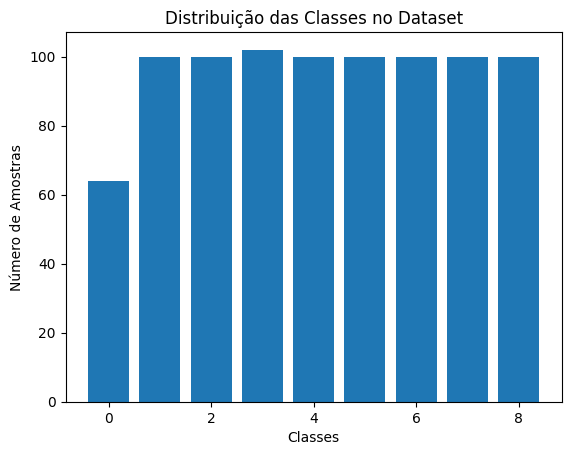

In [15]:
import matplotlib.pyplot as plt

# Contagem de amostras por classe
contagem_classes = np.unique(rotulos, return_counts=True)

# Gráfico de barras
plt.bar(contagem_classes[0], contagem_classes[1])
plt.xlabel('Classes')
plt.ylabel('Número de Amostras')
plt.title('Distribuição das Classes no Dataset')
plt.show()

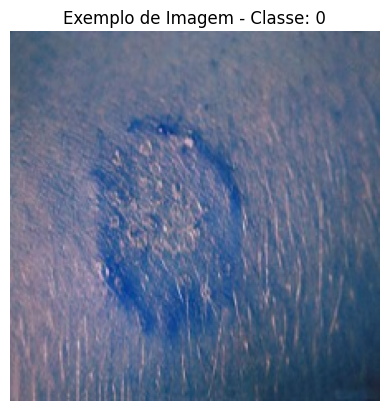

In [16]:
# Exibindo uma imagem de exemplo
plt.imshow(imagens[0])
plt.title(f'Exemplo de Imagem - Classe: {rotulos[0]}')
plt.axis('off')
plt.show()

6/6 [==============================] - 7s 918ms/step


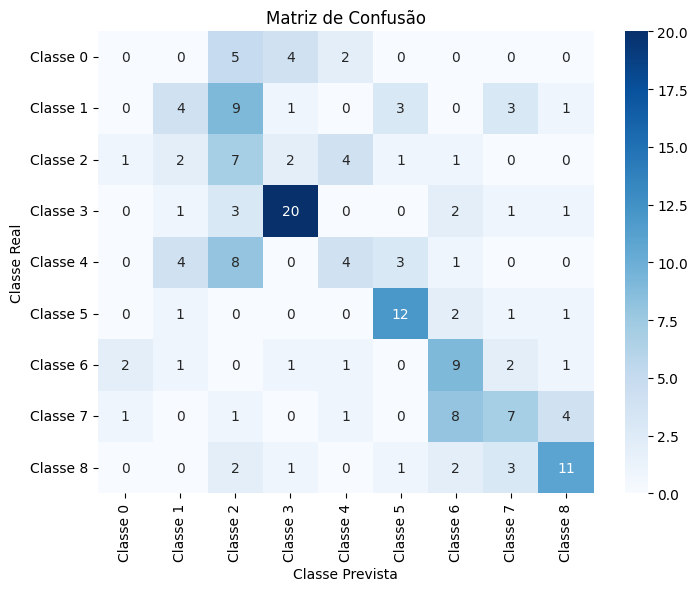

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fazendo previsões no conjunto de teste
previsoes = model.predict(imagens_teste)
rotulos_previstos = np.argmax(previsoes, axis=1)

# Criando a matriz de confusão
matriz_confusao = confusion_matrix(rotulos_teste, rotulos_previstos)

# Exibindo a matriz de confusão usando um mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe '+str(i) for i in range(9)],
            yticklabels=['Classe '+str(i) for i in range(9)])
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

Epoch 1/15
22/22 [==============================] - 105s 5s/step - loss: 1.1476 - accuracy: 0.6618 - val_loss: 3.9615 - val_accuracy: 0.3391
Epoch 2/15
22/22 [==============================] - 83s 4s/step - loss: 0.8511 - accuracy: 0.7312 - val_loss: 4.0636 - val_accuracy: 0.4080
Epoch 3/15
22/22 [==============================] - 89s 4s/step - loss: 0.6043 - accuracy: 0.8064 - val_loss: 6.0387 - val_accuracy: 0.4195
Epoch 4/15
22/22 [==============================] - 87s 4s/step - loss: 1.1723 - accuracy: 0.6272 - val_loss: 2.6012 - val_accuracy: 0.3103
Epoch 5/15
22/22 [==============================] - 83s 4s/step - loss: 1.3271 - accuracy: 0.5405 - val_loss: 2.7479 - val_accuracy: 0.3218
Epoch 6/15
22/22 [==============================] - 84s 4s/step - loss: 1.0044 - accuracy: 0.6763 - val_loss: 3.5677 - val_accuracy: 0.3276
Epoch 7/15
22/22 [==============================] - 87s 4s/step - loss: 0.8724 - accuracy: 0.7081 - val_loss: 4.0876 - val_accuracy: 0.3333
Epoch 8/15
22/22 [=

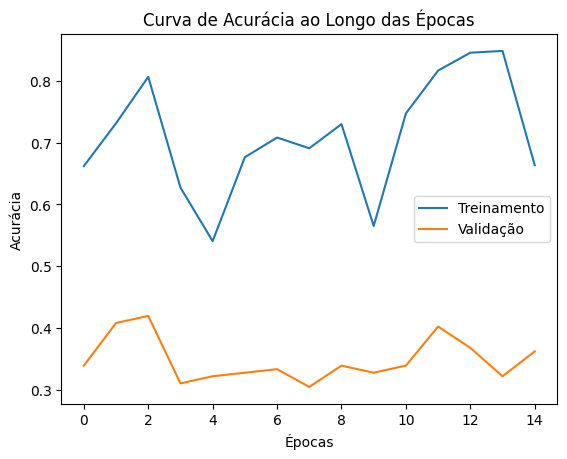

In [18]:
historico_treinamento = model.fit(imagens_treinamento, rotulos_treinamento, epochs=15, validation_data=(imagens_teste, rotulos_teste))

# Gráfico de curva de acurácia
plt.plot(historico_treinamento.history['accuracy'], label='Treinamento')
plt.plot(historico_treinamento.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Curva de Acurácia ao Longo das Épocas')
plt.legend()
plt.show()

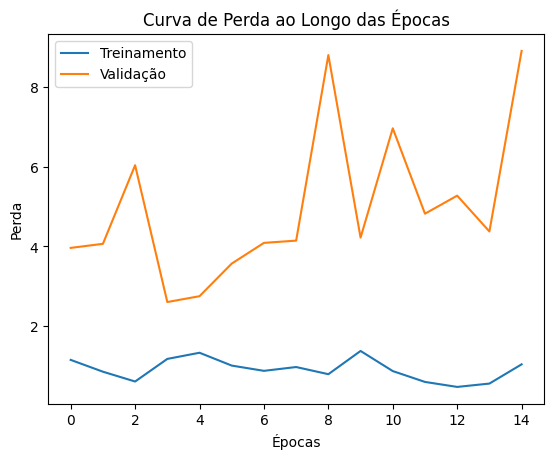

In [19]:
# Gráfico de curva de perda
plt.plot(historico_treinamento.history['loss'], label='Treinamento')
plt.plot(historico_treinamento.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Curva de Perda ao Longo das Épocas')
plt.legend()
plt.show()

<h1> MODELO PREDITIVO SVM </h1>


In [9]:
# Importando as bibliotecas necessárias

import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from skimage import io, transform

In [10]:
# Definindo o caminho para as pastas de treino e teste
caminho_treino = "/content/drive/MyDrive/Global Solution - IA/Treino"
caminho_teste = "/content/drive/MyDrive/Global Solution - IA/Teste"

In [11]:
# Lista de doenças
doencas = ['Candidiase Cutânea', 'Carcinoma de células escamosas', 'Ceratose actinica', 'Dermatite atópica', 'Dermatofibroma', 'Lesão vascular', 'Melanoma', 'Nevo melanocitico', 'Verruga seborreica']


In [12]:
# Função para carregar imagens e rótulos
def carregar_dados(caminho):
    imagens = []
    rotulos = []
    for i, doenca in enumerate(doencas):
        caminho_doenca = os.path.join(caminho, doenca)
        for arquivo in os.listdir(caminho_doenca):
            caminho_imagem = os.path.join(caminho_doenca, arquivo)
            img = io.imread(caminho_imagem)
            img = transform.resize(img, (224, 224))  # Redimensionar a imagem para 224x224
            imagens.append(img.flatten())  # Achatando a imagem para um vetor unidimensional
            rotulos.append(i)  # Rótulo da doença

    return np.array(imagens), np.array(rotulos)

In [13]:
# Carregando dados de treino
X_treino, y_treino = carregar_dados(caminho_treino)

In [14]:
# Carregando dados de teste
X_teste, y_teste = carregar_dados(caminho_teste)

In [15]:
# Normalizando os dados
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

In [16]:
# Criando e treinando um modelo SVM linear
modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X_treino, y_treino)

SVC(kernel='linear')

In [17]:
# Prevendo os rótulos para o conjunto de teste
y_pred = modelo_svm.predict(X_teste)

In [18]:
import joblib

# Salvando o modelo usando joblib
joblib.dump(modelo_svm, 'modelo2_treinado.joblib')

['modelo2_treinado.joblib']

In [19]:
# Avaliando a acurácia
acuracia = accuracy_score(y_teste, y_pred)
print(f'Acurácia do SVM: {acuracia*100:.2f}%')

Acurácia do SVM: 65.19%


In [20]:
# Exibindo relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.42      0.50      0.45        20
           2       0.38      0.15      0.21        20
           3       0.88      1.00      0.93        21
           4       0.42      0.50      0.45        20
           5       0.72      0.90      0.80        20
           6       0.53      0.45      0.49        20
           7       0.75      0.60      0.67        20
           8       0.85      0.85      0.85        20

    accuracy                           0.65       181
   macro avg       0.64      0.65      0.63       181
weighted avg       0.64      0.65      0.63       181

